# AdaBoosting Algorithm from scratch

In [5]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
#importing file
iris = pd.read_csv("iris.csv")  

In [8]:
iris = iris.drop('Unnamed: 0', axis=1)

In [9]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [10]:
#considering only two classes
example = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [11]:
example.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [12]:
#replacing the two classes with +1 and -1
example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

/var/folders/14/v7hbm6r123x9jm36xzbj6x0c0000gn/T/ipykernel_2683/3357937336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])


In [13]:
example = example.drop('Species', axis = 1)

In [14]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

In [15]:
example.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [16]:
#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [17]:
example1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
88,5.6,3.0,4.1,1.3,1,0.01
71,6.1,2.8,4.0,1.3,1,0.01
74,6.4,2.9,4.3,1.3,1,0.01
128,6.4,2.8,5.6,2.1,-1,0.01
108,6.7,2.5,5.8,1.8,-1,0.01
101,5.8,2.7,5.1,1.9,-1,0.01
124,6.7,3.3,5.7,2.1,-1,0.01
89,5.5,2.5,4.0,1.3,1,0.01
79,5.7,2.6,3.5,1.0,1,0.01
117,7.7,3.8,6.7,2.2,-1,0.01


In [68]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]
y_train

88     1
71     1
74     1
128   -1
108   -1
101   -1
124   -1
89     1
79     1
117   -1
96     1
54     1
128   -1
84     1
78     1
70     1
112   -1
134   -1
105   -1
64     1
106   -1
137   -1
142   -1
79     1
63     1
101   -1
79     1
131   -1
117   -1
70     1
91     1
117   -1
87     1
106   -1
105   -1
70     1
92     1
141   -1
55     1
127   -1
95     1
110   -1
108   -1
69     1
98     1
53     1
94     1
105   -1
123   -1
139   -1
142   -1
51     1
140   -1
112   -1
73     1
83     1
90     1
123   -1
56     1
124   -1
59     1
81     1
76     1
118   -1
125   -1
85     1
124   -1
68     1
99     1
147   -1
119   -1
147   -1
106   -1
119   -1
132   -1
61     1
92     1
68     1
53     1
99     1
135   -1
53     1
122   -1
78     1
144   -1
103   -1
97     1
140   -1
58     1
102   -1
140   -1
139   -1
139   -1
99     1
142   -1
84     1
124   -1
117   -1
97     1
60     1
Name: Label, dtype: int64

In [19]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.25, 0.25, 'gini = 0.111\nsamples = 51\nvalue = [3, 48]'),
 Text(0.75, 0.25, 'gini = 0.04\nsamples = 49\nvalue = [48, 1]')]

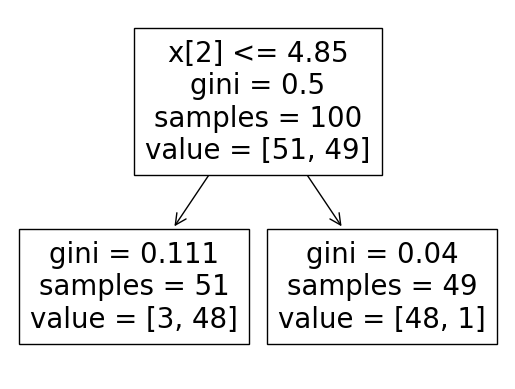

In [20]:
#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [21]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [22]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [23]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [24]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [25]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])

In [26]:
e1

0.07

In [27]:
#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [28]:
#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [29]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [30]:
example['prob2'] = round(normalized_weight,4)

In [31]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054


In [32]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.25, 0.25, 'gini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.75, 0.25, 'gini = 0.298\nsamples = 55\nvalue = [45, 10]')]

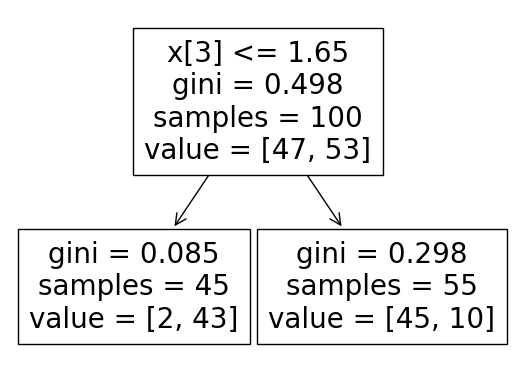

In [33]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [34]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1


In [35]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [36]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.09840000000000002

In [37]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

1.1075650793336793

In [38]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [39]:
example['prob3'] = round(normalized_weight,4)

In [40]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030


In [41]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'x[2] <= 5.05\ngini = 0.484\nsamples = 100\nvalue = [41, 59]'),
 Text(0.25, 0.25, 'gini = 0.323\nsamples = 69\nvalue = [14, 55]'),
 Text(0.75, 0.25, 'gini = 0.225\nsamples = 31\nvalue = [27, 4]')]

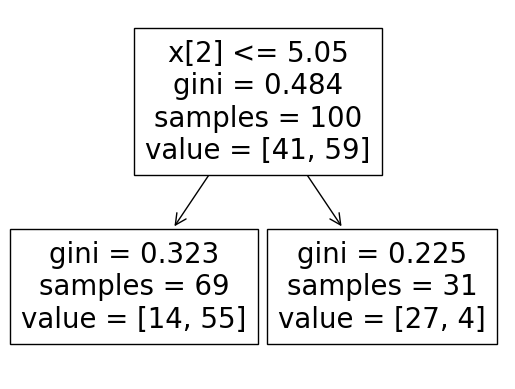

In [42]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [43]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [44]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.2008

In [45]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [46]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [47]:
example['prob4'] = round(normalized_weight,4)

In [48]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396,1,0.0,0.0248
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019


In [49]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'x[3] <= 1.75\ngini = 0.48\nsamples = 100\nvalue = [60, 40]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 60\nvalue = [24, 36]'),
 Text(0.75, 0.25, 'gini = 0.18\nsamples = 40\nvalue = [36, 4]')]

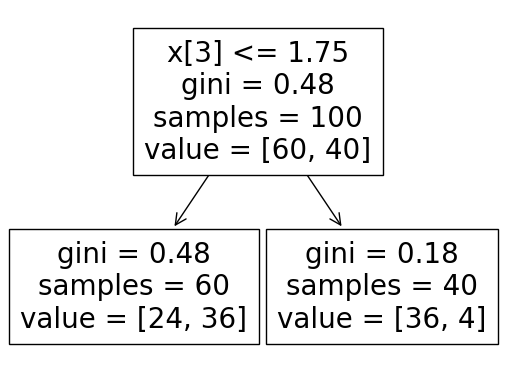

In [50]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [51]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [52]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.23510000000000003

In [53]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [54]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2933446720489712
1.1075650793336793
0.6906509197583848
0.5898670753908981


In [55]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [56]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [57]:
example['final_pred'] = np.sign(list(t))

In [58]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396,1,0.0,0.0248,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0


In [59]:
#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[46,  4],
       [ 2, 48]])

In [60]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

94.0

In [61]:
#Fitting the model using the adaboost classifier library

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
iris = pd.read_csv("iris.csv")  
iris = iris.drop('Unnamed: 0', axis=1)
iris = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [64]:
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

In [65]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [66]:
clf.predict([[5.5, 2.5, 4.0, 1.3]])

/Users/raviailani/Documents/prudhvi-dm/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [67]:
clf.score(X_train, y_train)

0.96